In [255]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


### Let's import our dataset!

In [256]:
data_train = pd.read_csv('../../datasets/titanic/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Searching for null or NaN data.

In [257]:
count = data_train.isna().sum()
count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### As we see we have null data in the columns Age, Cabin and Embarked let's handle this

First, I'm going to drop the rows that don't have the port of embarkation 

In [258]:
data_train = data_train.dropna(subset='Embarked')

To handle the missing Age i'm going to replace it with the median of the ages in our dataset.

In [259]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='median')

data_train['Age'] = imputer.fit_transform(data_train[['Age']]).ravel() 

data_train['Age'].isnull().sum()


/tmp/ipykernel_25344/2017272188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Age'] = imputer.fit_transform(data_train[['Age']]).ravel()


0

### Handle missing Cabins

In [260]:
data_train.loc[data_train['Cabin'].isna(), 'Cabin'] = 'No Cabin'
data_train = data_train.replace({'male': 0, 'female': 1})

/tmp/ipykernel_25344/3463676612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train = data_train.replace({'male': 0, 'female': 1})


### Now lets visualize some data!
First lets compare the number of survivors

In [261]:
filterFemale = (data_train['Sex'] == 0) & (data_train['Survived'] == 1)
filaterMale = (data_train['Sex'] == 1) & (data_train['Survived'] == 1)

countFemale = data_train[filterFemale].shape[0]
countMale = data_train[filaterMale].shape[0]


survivorBySex = pd.DataFrame({'Sex': ['Female', 'Male'], 'Survivors': [countFemale, countMale]})


survivorBySex['Sex']


0    Female
1      Male
Name: Sex, dtype: object

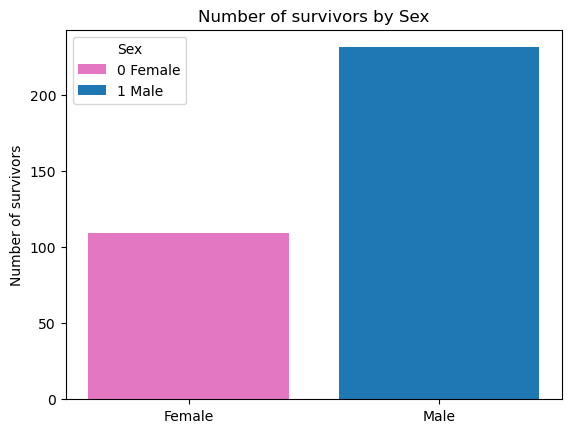

In [262]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bar_colors = ['tab:pink', 'tab:blue']
labels = ["0 Female", "1 Male"]
ax.bar(survivorBySex['Sex'], survivorBySex['Survivors'], color=bar_colors, label=labels )
ax.legend(title="Sex")
ax.set_ylabel("Number of survivors")
plt.title("Number of survivors by Sex")
plt.show()

Now lets see how many survivors were there by the age

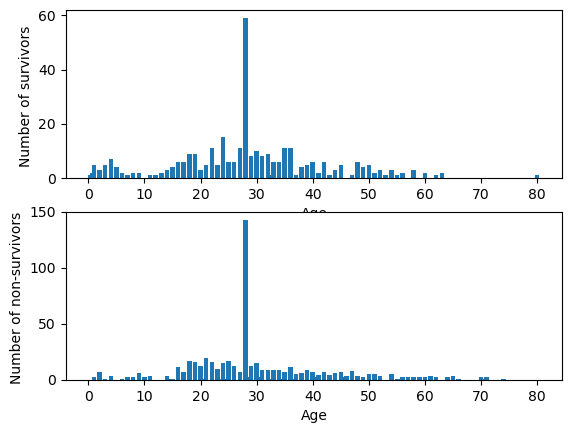

In [263]:

survivorFilterByAge =  data_train.groupby(['Age'])['Survived'].apply(lambda g: (g==1).sum()).reset_index()
nonSurvivorsFilterByAge =  data_train.groupby(['Age'])['Survived'].apply(lambda g: (g==0).sum()).reset_index()

survivorFilterByAge.to_csv('survivor_ByAge.csv', index=False)

fig2, ax2 = plt.subplots(2)

fig.suptitle("Comparing number of survivors by Age")

ax2[0].bar(survivorFilterByAge['Age'], survivorFilterByAge['Survived'])
ax2[0].set_ylabel("Number of survivors ")
ax2[0].set_xlabel("Age")


##


ax2[1].bar(nonSurvivorsFilterByAge['Age'], nonSurvivorsFilterByAge['Survived'])
ax2[1].set_ylabel("Number of non-survivors ")
ax2[1].set_xlabel("Age")



plt.show()

### Lets visualize how the ticket class is related to the survival rate.

   Pclass   Survived
0       1  62.616822
1       2  47.282609
2       3  24.236253


Text(0.5, 0, 'Ticket class')

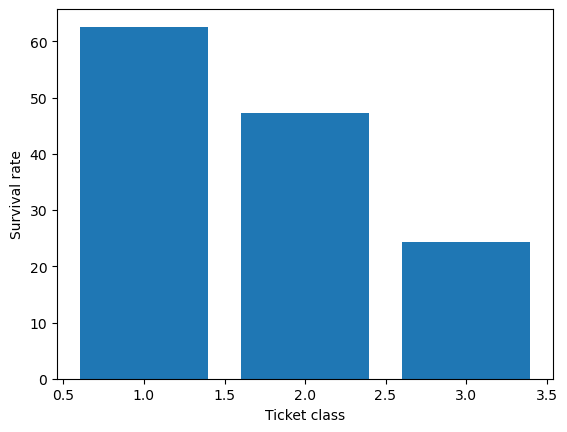

In [264]:

noSurvivorFilterByTicketClass =  data_train.groupby(['Pclass'])['Survived'].apply(lambda g: ((g==1).sum()/g.count())*100).reset_index()

print(noSurvivorFilterByTicketClass)


fig4, ax4 = plt.subplots()

fig.suptitle("Comparing number of survivors by Age")

ax4.bar(noSurvivorFilterByTicketClass['Pclass'], noSurvivorFilterByTicketClass['Survived'])
ax4.set_ylabel("Survival rate")
ax4.set_xlabel("Ticket class")


As we see there's a clear relation between the ticket class and the probability of surviving to the titanic disaster

- People with the class 1 ticket were important people with money and power, so their rescue was a priority
- The class 3 ticket in the titanic was the cheapest, the accomodations were really basic and the cabins were located near the ship engines

### Now let's train the model

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data_train[['Sex', 'Age', 'Pclass']]
y = data_train['Survived']


X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


LRegression = LogisticRegression(random_state=1).fit(X_train, y_train)

print(y_test)


387    1
259    1
771    0
208    1
683    0
      ..
499    0
731    0
373    0
588    0
234    0
Name: Survived, Length: 178, dtype: int64


## Predictions and score

In [ ]:
from sklearn.metrics import accuracy_score


ypred = LRegression.predict(Xtest)


print("The titanic disaster survival prediction Logistic regression has a precision of", accuracy_score(y_test, ypred))





[1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0]
The titanic disaster survival prediction Logistic regression has a precision of 0.8202247191011236
